In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
import h5py
import numpy as np

In [32]:
def load_OASIS():
    with h5py.File('..\..\Datasets\OASIS_balanced.h5', 'r') as hdf:

        G1 = hdf.get('Train Data')
        trainX = np.array(G1.get('trainX'))
        trainY = np.array(G1.get('trainY'))
        G2 = hdf.get('Test Data')
        testX = np.array(G2.get('testX'))
        testY = np.array(G2.get('testY'))

        return trainX, trainY, testX, testY

In [33]:
def load_ADNI():
    with h5py.File('..\..\Datasets\ADNI_enhanced.h5', 'r') as hdf:

        G1 = hdf.get('Train Data')
        trainX = np.array(G1.get('x_train'))
        trainY = np.array(G1.get('y_train'))
        G2 = hdf.get('Test Data')
        testX = np.array(G2.get('x_test'))
        testY = np.array(G2.get('y_test'))

        return trainX, trainY, testX, testY

In [34]:
dataset = 'AdDNI'
# read the data which is also normalized.
if dataset == 'ADNI':
    x_train, y_train, x_test, y_test = load_ADNI()
else:
    x_train, y_train, x_test, y_test = load_OASIS()

print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)

(8192, 176, 176) (8192,) (2560, 176, 176) (2560,)


In [35]:
from tensorflow.keras.utils import to_categorical
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)
print('X train shape', x_train.shape)
print('Y train shape', y_train_cat.shape)
row = x_train.shape[1]
col = x_train.shape[2]
print(row, col)

X train shape (8192, 176, 176, 1)
Y train shape (8192, 4)
176 176


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics

[639 635 662 624]


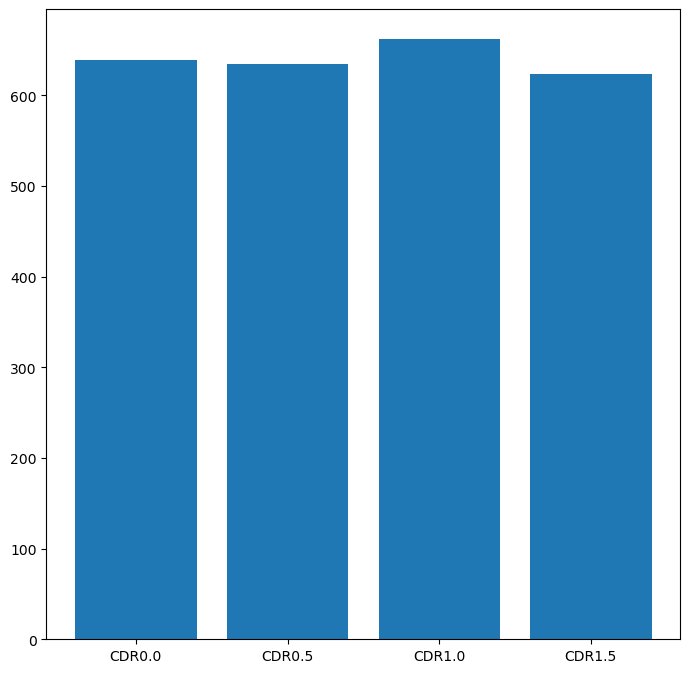

In [37]:
import matplotlib.pyplot as plt
labels = ['CDR0.0', 'CDR0.5', 'CDR1.0', 'CDR1.5']

# plot the distribution of the data

fig = plt.figure(figsize=(18, 18))
ax1 = fig.add_subplot(221)
print(np.bincount(y_test))
plt.bar(labels, np.bincount(y_test))
plt.show()


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

model2 = Sequential()

model2.add(Conv2D(16, (3, 3), input_shape=(row,col,1), activation='relu'))
model2.add(Conv2D(16, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(16, (1,1)))

model2.add(Flatten())

model2.add(Dense(4, activation = 'softmax'))

model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics =['acc'])
model2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 174, 174, 16)      160       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 172, 172, 16)      2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 86, 86, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 84, 84, 32)        4640      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 82, 82, 32)        9248      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 80, 80, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 40, 40, 32)       

In [39]:
filepath = 'best_weights-adni.hdf5'
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopping = EarlyStopping(monitor = 'acc', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'acc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)
callback_list = [earlystopping, checkpoint]

In [40]:
es = EarlyStopping(monitor='val_acc', mode='max')

history=model2.fit(x_train, y_train_cat, batch_size = 128, epochs = 200, verbose = 1, validation_data = (x_test, y_test_cat), callbacks=callback_list)
prediction = model2.predict_classes(x_test)


Epoch 1/200
64/64 [==============================] - 7s 99ms/step - loss: 1.0272 - acc: 0.5326 - val_loss: 0.7072 - val_acc: 0.7027

Epoch 00001: acc improved from -inf to 0.53259, saving model to best_weights-adni.hdf5
Epoch 2/200
64/64 [==============================] - 6s 97ms/step - loss: 0.5407 - acc: 0.7744 - val_loss: 0.4913 - val_acc: 0.7984

Epoch 00002: acc improved from 0.53259 to 0.77441, saving model to best_weights-adni.hdf5
Epoch 3/200
64/64 [==============================] - 6s 95ms/step - loss: 0.3948 - acc: 0.8431 - val_loss: 0.4197 - val_acc: 0.8266

Epoch 00003: acc improved from 0.77441 to 0.84314, saving model to best_weights-adni.hdf5
Epoch 4/200
64/64 [==============================] - 6s 96ms/step - loss: 0.2752 - acc: 0.8909 - val_loss: 0.3416 - val_acc: 0.8637

Epoch 00004: acc improved from 0.84314 to 0.89087, saving model to best_weights-adni.hdf5
Epoch 5/200
64/64 [==============================] - 6s 96ms/step - loss: 0.1900 - acc: 0.9281 - val_loss: 0.29

c:\Users\noush\anaconda3\envs\tf2.5\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
from sklearn.metrics import multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(y_true=y_test, y_pred=prediction, labels=[0,1,2,3], samplewise=False)
tn = mcm[:,0,0]
tp = mcm[:,1,1]
fp = mcm[:,0,1]
fn = mcm[:,1,0]
specificity = tn/(tn+fp)
print("Specificity or TNR", np.mean(specificity))

sensitivity = tp/(tp+fn)
print("Sensitivity or TPR or Recall", np.mean(sensitivity))

print("FNR ", 1-np.mean(sensitivity))

print("FPR", 1-np.mean(specificity))

from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(y_test, prediction))
y_pred_proba = model2.predict_proba(x_test)
auc = metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

#print AUC score
print("AUC =",auc)



Specificity or TNR 0.9810024302358854
Sensitivity or TPR or Recall 0.9434852256241506
FNR  0.0565147743758494
FPR 0.018997569764114597
Accuracy =  0.94296875


c:\Users\noush\anaconda3\envs\tf2.5\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


AUC = 0.9917765437545865


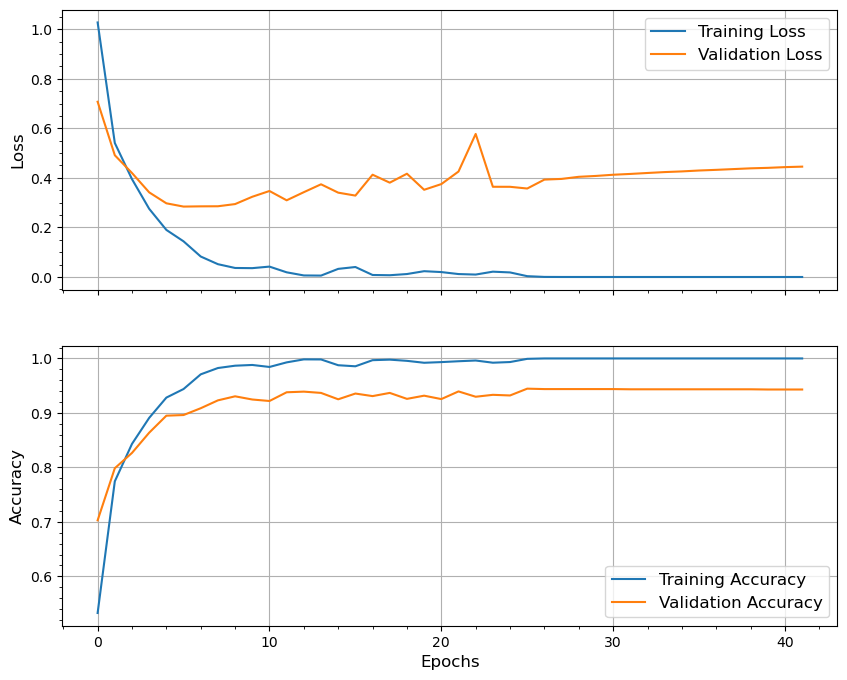

In [42]:
import pandas as pd
df = pd.DataFrame(history.history)
df.head()
# losses[['acc','val_acc']].plot()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1,sharex=True, figsize=(10,8))
ax[0].plot(df['loss'],label = 'Training Loss')
ax[0].plot(df['val_loss'],label = 'Validation Loss')
ax[1].plot(df['acc'],label = 'Training Accuracy')
ax[1].plot(df['val_acc'],label = 'Validation Accuracy')
ax[0].legend(loc='best',prop={'size':12})
ax[1].legend(loc='best',prop={'size':12})
ax[0].minorticks_on()
ax[1].minorticks_on()
ax[1].set_xlabel('Epochs', fontsize=12)
ax[1].set_ylabel('Accuracy', fontsize=12)
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].grid()
ax[1].grid()
plt.show()

#saving the results
df.to_csv('results-ADNI-CNN-Scratch.csv')

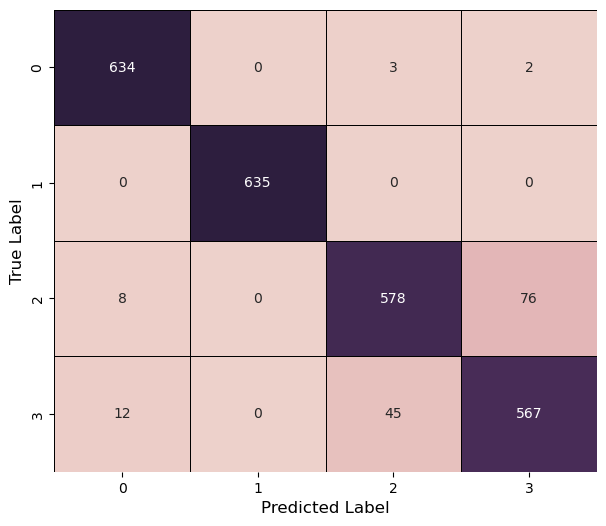

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, prediction)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 6))
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linewidth=0.5,linecolor="black",fmt='')
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
plt.savefig("CM-CNN-Scratch-ADNI.pdf")